In [45]:
#Inlcuimos las librerias que vamos a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [46]:
#Cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)

In [47]:
#categorizamos
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events['event'] = events['event'].astype('category')
events['dia'] = events['timestamp'].dt.day
events['mes'] = events['timestamp'].dt.month

In [48]:
#Cambiamos el idioma de algunas variables utilizadas
events.replace({'color': {'Preto': 'Negro', 'Dourado': 'Dorado','Cinza espacial' : 'Gris espacial', 'Branco' : 'Blanco', 'Prateado' : 'Plateado', 'Ouro Rosa' : 'Rosa Oro', 
                          'Cinza' : 'Gris', 'Rojo Oscuro' : ''}},  inplace = True)
events.replace({'condition': {'Muito Bom': 'Muy bien', 'Bom': 'Bien','Novo' : 'Nuevo', 'Bom - Sem Touch ID' : 'Bien - sin touch ID'}},  inplace = True)

In [49]:
#Df solo con eventos del tipo conversion
conversion = events.loc[events['event'] == 'conversion',['timestamp', 'person','model','condition','storage','color']]
conversion.head()

,timestamp,person,model,condition,storage,color
220,2018-03-20 17:46:12,00204059,Motorola Moto X2,Muy bien,32GB,Couro Vintage
2282,2018-04-26 22:28:53,00c13dee,Samsung Galaxy Core Plus Duos TV,Muy bien,4GB,Blanco
2547,2018-06-10 14:37:50,00fdbb4b,Samsung Galaxy S6 Flat,Muy bien,32GB,Blanco
4245,2018-03-16 13:50:25,0146a9df,iPhone 5s,Bien,32GB,Gris espacial
6985,2018-02-09 22:07:07,01db2fe6,Samsung Galaxy J5,Bien,16GB,Negro


In [50]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 220 to 1008943
Data columns (total 6 columns):
timestamp    1172 non-null datetime64[ns]
person       1172 non-null object
model        1172 non-null object
condition    1172 non-null object
storage      1172 non-null object
color        1172 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 64.1+ KB


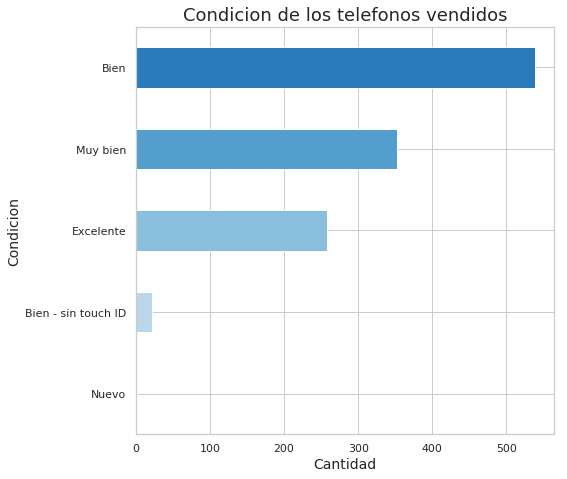

In [51]:
condition_plot = conversion['condition'].value_counts().sort_values(ascending = True).plot.barh(figsize = (7.5,7.5), color=sns.color_palette('Blues'))
condition_plot.set_title('Condicion de los telefonos vendidos',fontsize = 18)
condition_plot.set_ylabel('Condicion',fontsize = 14)
condition_plot.set_xlabel('Cantidad',fontsize = 14);

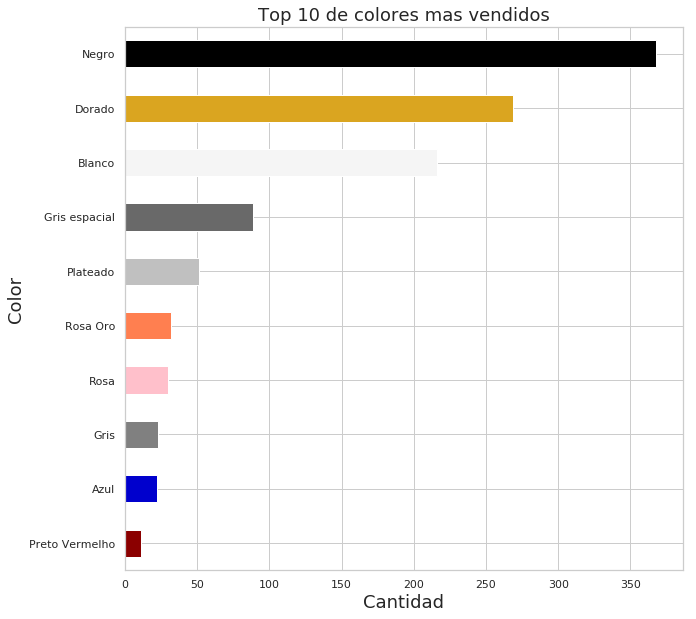

In [52]:
colores = ['#8B0000','#0000CD','#808080','#FFC0CB','#FF7F50','#C0C0C0','#696969','#F5F5F5','#DAA520','#000000']
color_plot = conversion['color'].value_counts().head(10).sort_values().plot.barh(figsize = (10,10), color = sns.color_palette(colores))
color_plot.set_title('Top 10 de colores mas vendidos',fontsize = 18)
color_plot.set_ylabel('Color',fontsize = 18)
color_plot.set_xlabel('Cantidad',fontsize = 18);

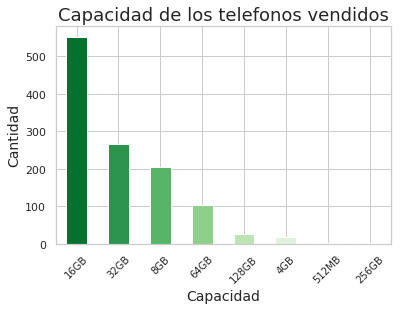

In [53]:
storage_plot = conversion['storage'].value_counts().plot(kind = 'bar' , color=sns.color_palette('Greens_r'))
storage_plot.set_title('Capacidad de los telefonos vendidos',fontsize = 18)
storage_plot.set_xlabel('Capacidad',fontsize = 14)
storage_plot.set_ylabel('Cantidad',fontsize = 14)
storage_plot.set_xticklabels(storage_plot.get_xticklabels(), rotation = 45, fontsize = 10);

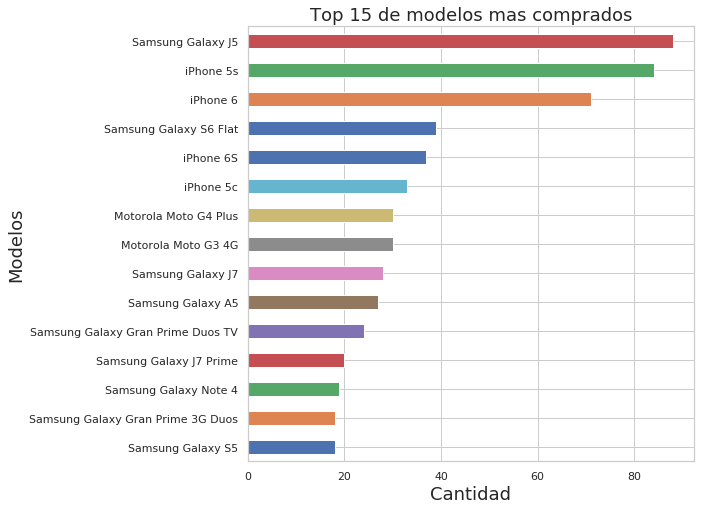

In [54]:
model = conversion['model'].value_counts().head(15).sort_values()
model_plot = model.plot(kind = 'barh', color =sns.color_palette(),figsize = (8,8))
model_plot.set_title('Top 15 de modelos mas comprados',fontsize = 18)
model_plot.set_xlabel('Cantidad',fontsize = 18)
model_plot.set_ylabel('Modelos',fontsize = 18);

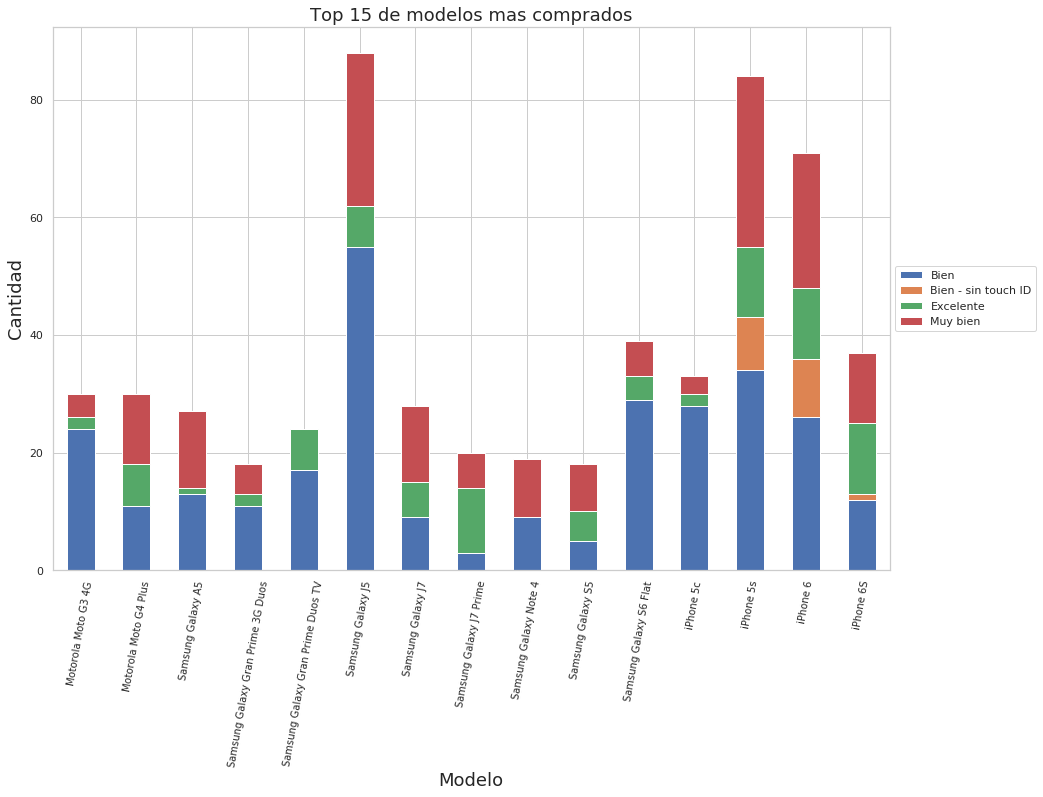

In [86]:
modelos_mas_vendidos = conversion['model'].value_counts().sort_values(ascending = False).head(15).index

model_ = conversion.loc[:,['model','condition']]
model_ = model_.loc[model_['model'].isin(modelos_mas_vendidos)] 
model_2 = model_.groupby(['model','condition']).agg({'condition':'count'}).unstack()
model_2.columns = model_2.columns.droplevel(0)
model_2.fillna(0, inplace = True)

model_plot = model_2.plot.bar(stacked = True, color =sns.color_palette(),figsize = (15,10))
model_plot.set_title('Top 15 de modelos mas comprados',fontsize = 18)
model_plot.set_ylabel('Cantidad',fontsize = 18)
model_plot.set_xlabel('Modelo',fontsize = 18)
model_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
model_plot.set_xticklabels(model_plot.get_xticklabels(), rotation = 80, fontsize = 10);

In [55]:
galaxy_j5 = conversion[conversion['model'] == 'Samsung Galaxy J5']
galaxy_j5 = galaxy_j5[['storage','condition']]
galaxy_j5 = pd.DataFrame(galaxy_j5.groupby('storage')['condition'].value_counts())
galaxy_j5 = galaxy_j5.rename(columns = {'condition':'cantidad'})
galaxy_j5 = galaxy_j5.reset_index()
galaxy_j5 = galaxy_j5.rename(columns = {'storage':'capacidad'})
galaxy_j5 = galaxy_j5.pivot('capacidad','condition','cantidad')
galaxy_j5.fillna(0)

condition,Bien,Excelente,Muy bien
capacidad,,,
16GB,54.0,7.0,26.0
8GB,1.0,0.0,0.0


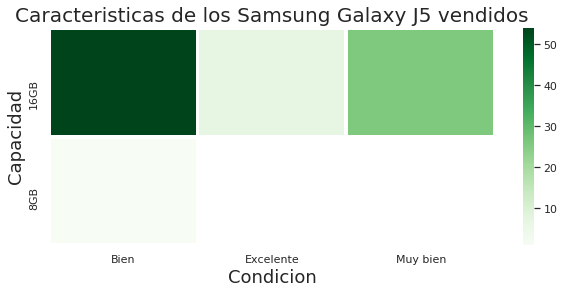

In [56]:
plt.figure(figsize = (10,4))
galaxy_j5_heatmap = sns.heatmap(galaxy_j5,linewidth = 3, cmap = 'Greens')
galaxy_j5_heatmap.set_title('Caracteristicas de los Samsung Galaxy J5 vendidos',Fontsize = 20)
galaxy_j5_heatmap.set_ylabel('Capacidad',Fontsize = 18)
galaxy_j5_heatmap.set_xlabel('Condicion',fontsize = 18);

In [57]:
iPhone5s = conversion[conversion['model'] == 'iPhone 5s']
iPhone5s = iPhone5s[['storage','condition']]
iPhone5s = pd.DataFrame(iPhone5s.groupby('storage')['condition'].value_counts())
iPhone5s = iPhone5s.rename(columns = {'condition':'cantidad'})
iPhone5s = iPhone5s.reset_index()
iPhone5s = iPhone5s.rename(columns = {'storage':'capacidad'})
iPhone5s = iPhone5s.pivot('capacidad','condition','cantidad')
iPhone5s.fillna(0, inplace=True)
iPhone5s = iPhone5s.reindex(['64GB','32GB','16GB'])
iPhone5s

condition,Bien,Bien - sin touch ID,Excelente,Muy bien
capacidad,,,,
64GB,0.0,1.0,0.0,0.0
32GB,10.0,1.0,3.0,8.0
16GB,24.0,7.0,9.0,21.0


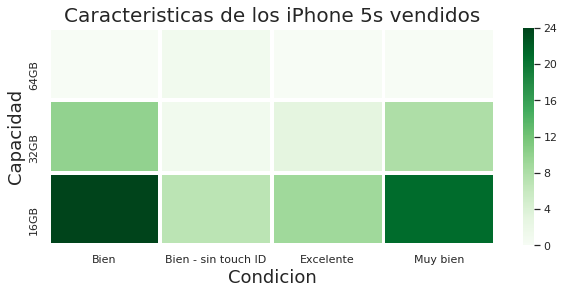

In [58]:
plt.figure(figsize = (10,4))
iPhone5s_heatmap = sns.heatmap(iPhone5s,linewidth = 3, cmap = 'Greens')
iPhone5s_heatmap.set_title('Caracteristicas de los iPhone 5s vendidos',Fontsize = 20)
iPhone5s_heatmap.set_ylabel('Capacidad',Fontsize = 18)
iPhone5s_heatmap.set_xlabel('Condicion',fontsize = 18);

In [59]:
iPhone6 = conversion[conversion['model'] == 'iPhone 6']
iPhone6 = iPhone6[['storage','condition']]
iPhone6 = pd.DataFrame(iPhone6.groupby('storage')['condition'].value_counts())
iPhone6.rename(columns = {'condition':'cantidad'}, inplace = True)
iPhone6.reset_index(inplace = True)
iPhone6.rename(columns = {'storage':'capacidad'}, inplace = True)
iPhone6 = iPhone6.pivot('capacidad','condition','cantidad')
iPhone6.fillna(0 , inplace = True)
iPhone6 = iPhone6.reindex(['128GB','64GB','16GB'])
iPhone6

condition,Bien,Bien - sin touch ID,Excelente,Muy bien
capacidad,,,,
128GB,1.0,0.0,0.0,0.0
64GB,14.0,1.0,1.0,6.0
16GB,11.0,9.0,11.0,17.0


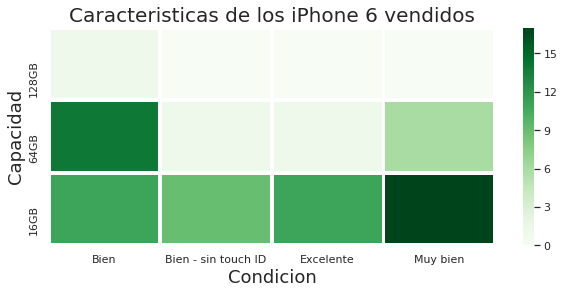

In [60]:
plt.figure(figsize = (10,4))
iPhone6_heatmap = sns.heatmap(iPhone6,linewidth = 3, cmap = 'Greens')
iPhone6_heatmap.set_title('Caracteristicas de los iPhone 6 vendidos',Fontsize = 20)
iPhone6_heatmap.set_ylabel('Capacidad',Fontsize = 18)
iPhone6_heatmap.set_xlabel('Condicion',fontsize = 18);

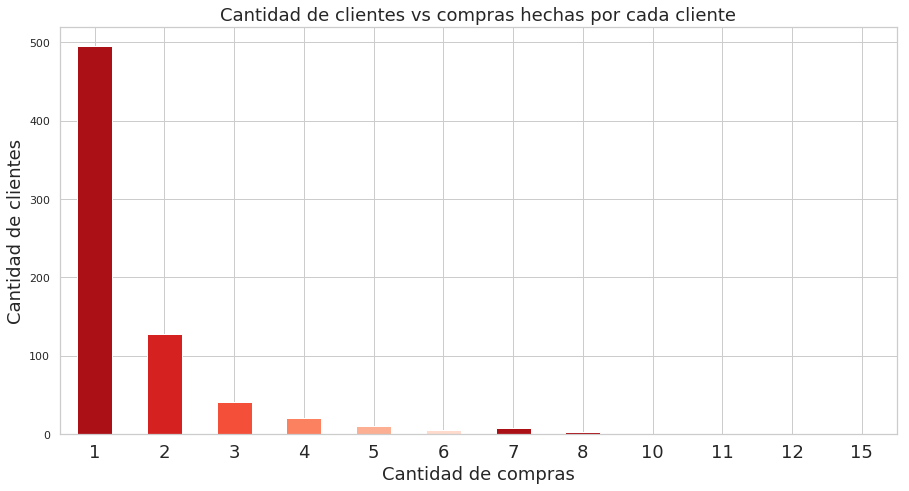

In [61]:
cantidad_plot = conversion['person'].value_counts().value_counts().sort_index().plot(kind = 'bar', color=sns.color_palette('Reds_r'),  figsize=(15,7.5) ) # con normalize = True en value_counts se podria mostrar en % 
cantidad_plot.set_title('Cantidad de clientes vs compras hechas por cada cliente',fontsize = 18)
cantidad_plot.set_xlabel('Cantidad de compras',fontsize = 18)
cantidad_plot.set_ylabel('Cantidad de clientes',fontsize = 18);
cantidad_plot.set_xticklabels(cantidad_plot.get_xticklabels(), rotation = 0, fontsize = 18);

In [62]:
dias = conversion['timestamp'].dt.weekday_name.value_counts().sort_values()
dias = dias.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dias

Monday       184
Tuesday      215
Wednesday    189
Thursday     200
Friday       175
Saturday     106
Sunday       103
Name: timestamp, dtype: int64

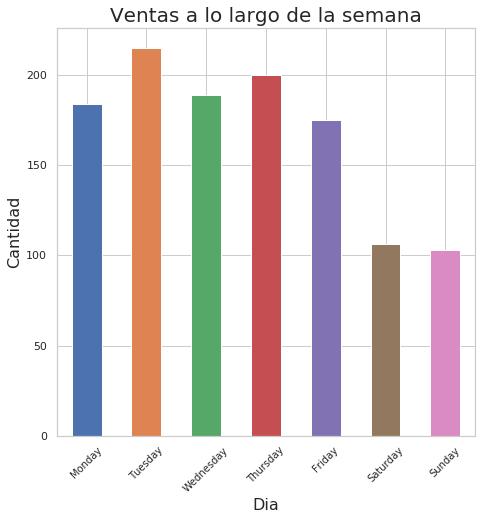

In [89]:
g = dias.plot(kind = 'bar',color=sns.color_palette(),figsize = (7.5,7.5))
g.set_title('Ventas a lo largo de la semana',fontsize = 20)
g.set_xlabel('Dia',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10);

In [98]:
compras_mes = conversion['timestamp'].dt.month.value_counts().sort_index() #este grafico deberia empezar de 1? mostrar 1,7,14,21,28?
compras_mes = compras_mes.to_frame()
compras_mes['cant_dias'] = [31, 28, 31, 30, 31, 15]
compras_mes['ventas_por_dia'] = compras_mes['timestamp']/compras_mes['cant_dias']
compras_mes

,timestamp,cant_dias,ventas_por_dia
1,63,31,2.032258
2,74,28,2.642857
3,265,31,8.548387
4,316,30,10.533333
5,351,31,11.322581
6,103,15,6.866667


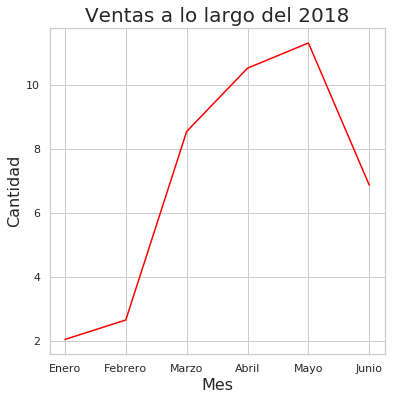

In [101]:
compras_mes_plot = compras_mes['ventas_por_dia'].plot(color='red',figsize = (6,6))
compras_mes_plot.set_title('Ventas a lo largo del 2018',fontsize = 20)
compras_mes_plot.set_xlabel('Mes',fontsize = 16)
compras_mes_plot.set_ylabel('Cantidad',fontsize = 16);
plt.xticks([1,2,3,4,5,6], ["Enero", "Febrero", "Marzo","Abril","Mayo","Junio"]);


In [66]:
conversion_mes_dia = events.loc[events['event'] == 'conversion',['timestamp','person', 'dia', 'mes']]
conversion_mes_dia.head()

,timestamp,person,dia,mes
220,2018-03-20 17:46:12,00204059,20,3
2282,2018-04-26 22:28:53,00c13dee,26,4
2547,2018-06-10 14:37:50,00fdbb4b,10,6
4245,2018-03-16 13:50:25,0146a9df,16,3
6985,2018-02-09 22:07:07,01db2fe6,9,2


In [67]:
quincenas_conversion = conversion_mes_dia.groupby(['mes', 'dia']).agg({'timestamp':'count'})
quincenas_conversion = quincenas_conversion.reset_index()
quincenas_conversion['quincena'] = np.where(quincenas_conversion['dia'] <= 15, '1', '2')
quincenas_conversion = quincenas_conversion.groupby(['mes', 'quincena']).agg({'timestamp':'sum'})
quincenas_conversion.columns = ['busquedas']
quincenas_conversion

busquedas
mes quincena           
1   1                29
    2                34
2   1                40
    2                34
3   1               104
    2               161
4   1               140
    2               176
5   1               247
    2               104
6   1               103

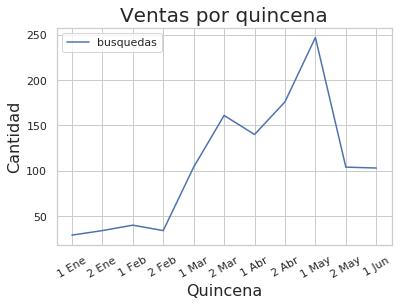

In [87]:
conversion_quincena_plot = quincenas_conversion.plot()
conversion_quincena_plot.set_title('Ventas por quincena',fontsize = 20)
conversion_quincena_plot.set_xlabel('Quincena',fontsize = 16)
conversion_quincena_plot.set_ylabel('Cantidad',fontsize = 16)
plt.xticks([0,1, 2,3, 4, 5, 6,7,8,9,10], ["1 Ene","2 Ene","1 Feb","2 Feb","1 Mar","2 Mar","1 Abr","2 Abr","1 May",
                                         "2 May","1 Jun"], rotation=30); 